# Loss

- We compute the loss by combining the output of the network and a corresponding ground truth label.
- The loss is computed as a continuous and differentiable signal that is representative of how well our network is performing. Then, using this signal, we automatically update the value of our weights so that they will get better at lowering this loss value at the next iteration.
- We repeat this process thousands or even millions of times until these weights have converged to a local minima of the loss function. 

In [1]:
import mxnet as mx
from mxnet.gluon import loss
import numpy as np
import matplotlib.pyplot as plt
from mxnet import nd

loss functions are chosen such that they are minimized when the predictions are perfect, but have high values as the predictions get worse. 

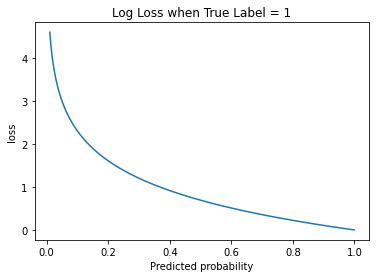

In [2]:
x = np.arange(0.01, 1, 0.001)
plt.plot(x, -np.log(x))
plt.title('Log Loss when True Label = 1')
plt.xlabel('Predicted probability')
o = plt.ylabel('loss')

The loss function first normalizes the raw output of your network using the Softmax activation. The Softmax activation normalizes each value between 0 and 1, and makes sure that they all sum up to 1.

$$\text{Softmax}(x_i)=\frac{e_i^x}{\sum_{j=1}^Ne_j^x}$$

This effectively turns the normalized output in a probability distribution over all your classes. You can see in the below example that the values are indeed normalized, and all sum up to 1.

In [3]:
nd.array([[1,2,3,4,5]]).softmax()


[[0.01165623 0.03168492 0.08612853 0.23412165 0.63640857]]
<NDArray 1x5 @cpu(0)>

In [4]:
nd.array([[1,2,3,4,5]]).softmax().sum()


[0.9999999]
<NDArray 1 @cpu(0)>

Now we take the Softmax cross entropy loss class from the gluon loss package. This function computes a Softmax cross entropy loss using your model outputs and the true label.

$$\text{loss}=-\sum_{i=0}^NP_i . \log{(\text{pred}_i)}$$

In [5]:
loss_fn = loss.SoftmaxCrossEntropyLoss()

In [6]:
predictions = nd.array([[10,20,40,5]])
label = nd.array([1])
loss_fn(predictions, label)


[20.]
<NDArray 1 @cpu(0)>

We can see here that the highest activation is for
the item at index 2 here, with a value of 40.
Meanwhile, the label is set to correspond to index 1.
Unsurprisingly, the loss is pretty high.
When we compute it here, we get a loss of 20. 

Now if we change the label to be set at index 2,
which corresponds to the highest activation,
we can see that the loss is now 0, which is what we would expect.
Indeed, prediction is correct in this case. 

In [7]:
label = nd.array([2])
loss_fn(predictions, label)


[0.]
<NDArray 1 @cpu(0)>

We want the loss to be representative of how well our network is doing and
how accurate its predictions are.
There are a variety of different losses for different tasks.
A lot of neural network training recipes actually use a combination of losses
during training in order to optimize in parallel for multiple objectives.
For example, in the object detection task, we optimize for
combination of the localization loss,
to learn to correctly detect the position of the bounding boxes.
And the object classification loss,
to learn to classify which objects are in each of the detected boxes. 